In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
colName=["Energy", "Veff", "Err", "Nthrown", "Npassed"]
Latt_up = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_Latten_up.txt",names=colName)
old = pd.read_csv("/users/PCON0003/cond0068/ARA/AraSim/veffs/Veff_std.txt",names=colName)
# pyrex = pd.read_csv("/users/PCON0003/cond0068/ARA/AraRoot/analysis/ARA_analysis/veff/pyrex_veff.csv",names=colName)

In [4]:
Latt_up=Latt_up.sort_values(by='Energy')
old=old.sort_values(by='Energy')
old.to_csv("AraSim_veff_proposal.csv", index=False)
old=old.reset_index()
Latt_up=Latt_up.reset_index()

In [5]:
Latt_up

,index,Energy,Veff,Err,Nthrown,Npassed
0,1.000000e+16,0.015985,0.002541,2420000,36.29132,1389374.0
1,3.162278e+16,0.073096,0.005524,2414948,165.60670,1324161.0
2,1.000000e+17,0.456491,0.013944,2420000,1036.39100,1290903.0
3,3.162278e+17,4.719121,0.074922,2420000,3857.05200,1262297.0
4,1.000000e+18,13.266848,0.126196,2413365,10813.59000,1245188.0


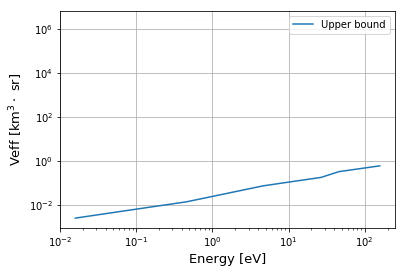

In [93]:
plt.loglog(Latt_up["Energy"], Latt_up["Veff"], label="Upper bound")
# plt.plot(old["Energy"], old["Veff"], label="Std")

plt.fill_between(Latt_up["Energy"],Latt_up["Veff"]-Latt_up["Err"],Latt_up["Veff"]+Latt_up["Err"], alpha=0.5)
# plt.fill_between(old["Energy"],old["Veff"]-old["Err"],old["Veff"]+old["Err"], alpha=0.5)
# plt.yscale("log")
# plt.xscale("log")
plt.xlabel("Energy [eV]",fontsize=13)
# plt.title("Comparison std & upper bound of L_atten", fontsize=12)
plt.ylabel("Veff [km$^3 \cdot$ sr]",fontsize=13)
plt.grid()
plt.legend()
plt.show()
plt.savefig("./veff_comparison.png", dpi=200)

## Histogram

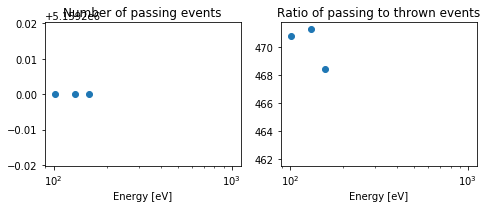

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

axes[0].scatter(Latt_up["Energy"],Latt_up["Npassed"])
axes[0].set_xscale('log')
# axes[0].set_yscale('log')
axes[0].set_title("Number of passing events")
axes[0].set_xlabel("Energy [eV]")


axes[1].scatter(Latt_up["Energy"],Latt_up["Npassed"]/Latt_up["Nthrown"])
axes[1].set_xscale('log')
axes[1].set_title("Ratio of passing to thrown events")
axes[1].set_xlabel("Energy [eV]")


# axes[1].set_yscale('log')

fig.tight_layout()
plt.show()
fig.savefig("./Latten_up_passing.png", dpi=200)